# 라이브러리 불러오기

In [99]:
from glob import glob 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import folium

# 데이터 불러오기

In [100]:
glob('data/*.csv')

['data/sample_submission.csv', 'data/test.csv', 'data/train.csv']

In [101]:
train = pd.read_csv(glob('data/*.csv')[2])
test = pd.read_csv(glob('data/*.csv')[1])
submission = pd.read_csv(glob('data/*.csv')[0])

# 데이터 살펴보기

칼럼 설명
- ID : 샘플 별 고유 id
- Exercise_Duration  : 운동 시간(분)
- Body_Temperature(F) : 체온
- BPM : 심박수
- Height(Feet) : 키(피트)
- Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
- Weight(lb) : 몸무게(파운드)
- Weight_Status : 체중 상태
- Gender : 성별
- Age : 나이
- Calories_Burned : 칼로리 소모량(목표 예측값)

In [102]:
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


## 결측치 확인

In [103]:
# 결측치 없음 
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [104]:
# 결측치 없음 
test.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

## 이상치 확인

In [105]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [106]:
train.describe(include='O')

,ID,Weight_Status,Gender
count,7500,7500,7500
unique,7500,3,2
top,TRAIN_6870,Normal Weight,F
freq,1,4681,3769


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



array([[<AxesSubplot:title={'center':'Exercise_Duration'}>,
        <AxesSubplot:title={'center':'Body_Temperature(F)'}>,
        <AxesSubplot:title={'center':'BPM'}>],
       [<AxesSubplot:title={'center':'Height(Feet)'}>,
        <AxesSubplot:title={'center':'Height(Remainder_Inches)'}>,
        <AxesSubplot:title={'center':'Weight(lb)'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Calories_Burned'}>, <AxesSubplot:>]],
      dtype=object)

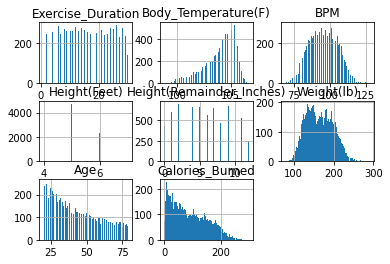

In [107]:
train.hist(bins=100)

<AxesSubplot:>

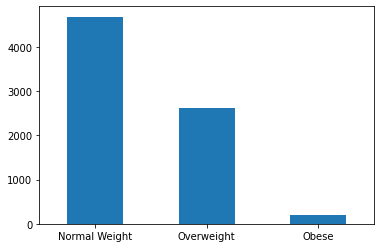

In [108]:
# Obese가 현저히 적음, Pd.get_dummies로 인코딩을 해주자 
train['Weight_Status'].value_counts().plot.bar(rot=0)

# 피처 엔지니어링

In [109]:
train.head(2)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0


In [110]:
# ft, inch column을 하나의 cm 컬럼으로 변경해줌 
train['Height(cm)'] = train['Height(Feet)'] * 30.48 + train['Height(Remainder_Inches)']*2.54
test['Height(cm)'] = test['Height(Feet)'] * 30.48 + test['Height(Remainder_Inches)']*2.54

In [111]:
# 기존 ft, inch column은 삭제 
train = train.drop(columns=['Height(Feet)','Height(Remainder_Inches)'])
test = test.drop(columns=['Height(Feet)','Height(Remainder_Inches)'])

In [112]:
test = test.set_index('ID')
train = train.set_index('ID')

In [113]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [114]:
train.head(2)

,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Age,Calories_Burned,Height(cm),Weight_Status_Normal Weight,Weight_Status_Obese,Weight_Status_Overweight,Gender_F,Gender_M
ID,,,,,,,,,,,,
TRAIN_0000,26.0,105.6,107.0,154.3,45,166.0,175.26,1,0,0,1,0
TRAIN_0001,7.0,103.3,88.0,224.9,50,33.0,198.12,0,0,1,0,1


In [115]:
test.head(2)

,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Age,Height(cm),Weight_Status_Normal Weight,Weight_Status_Obese,Weight_Status_Overweight,Gender_F,Gender_M
ID,,,,,,,,,,,
TEST_0000,26.0,105.1,107.0,114.6,45,154.94,1,0,0,1,0
TEST_0001,29.0,104.9,111.0,198.4,21,187.96,0,0,1,0,1


## 머신러닝 (Auto-Gluon) 

In [70]:
# !pip install autogluon

In [71]:
from autogluon.tabular import TabularPredictor
autogluon_automl = TabularPredictor(label='Calories_Burned', problem_type='regression', eval_metric='root_mean_squared_error')
autogluon_automl.fit(train_data=train)


No path specified. Models will be saved in: "AutogluonModels/ag-20230413_112947/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230413_112947/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #211-Ubuntu SMP Thu Nov 24 18:16:04 UTC 2022
Train Data Rows:    7500
Train Data Columns: 11
Label Column: Calories_Burned
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3631.09 MB
	Train Data (Original)  Memory Usage: 0.4 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenera

In [72]:
autogluon_automl.leaderboard()

                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -2.936536       0.217114  9.183968                0.000690           0.177713            2       True          5
1        ExtraTreesMSE  -3.043439       0.076009  2.667399                0.076009           2.667399            1       True          4
2      RandomForestMSE  -3.357543       0.112067  3.894493                0.112067           3.894493            1       True          3
3       KNeighborsDist  -8.883149       0.014862  1.177875                0.014862           1.177875            1       True          2
4       KNeighborsUnif  -9.153526       0.013486  1.266489                0.013486           1.266489            1       True          1


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.936536,0.217114,9.183968,0.000690,0.177713,2,True,5
1,ExtraTreesMSE,-3.043439,0.076009,2.667399,0.076009,2.667399,1,True,4
2,RandomForestMSE,-3.357543,0.112067,3.894493,0.112067,3.894493,1,True,3
3,KNeighborsDist,-8.883149,0.014862,1.177875,0.014862,1.177875,1,True,2
4,KNeighborsUnif,-9.153526,0.013486,1.266489,0.013486,1.266489,1,True,1


<AxesSubplot:>

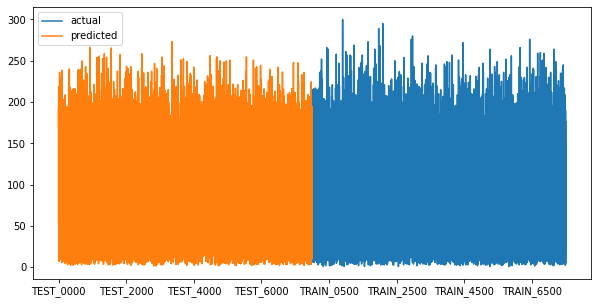

In [73]:
y_pred = autogluon_automl.predict(test)
autogluon_compare = pd.DataFrame(data={'actual': train['Calories_Burned'], 'predicted': y_pred})
autogluon_compare.plot(figsize=(10, 5))


## 머신러닝 - Catboost 

In [116]:
from catboost import CatBoostRegressor
catb = CatBoostRegressor(
         loss_function='RMSE',
         n_estimators=500, 
         learning_rate=0.05, 
         random_state=42
)
    


In [117]:
catb.fit(train.drop(columns=['Calories_Burned']), train['Calories_Burned'], verbose=100)


0:	learn: 59.9779679	total: 1.85ms	remaining: 922ms
100:	learn: 3.6514417	total: 166ms	remaining: 658ms
200:	learn: 2.1398073	total: 314ms	remaining: 467ms
300:	learn: 1.5370821	total: 456ms	remaining: 302ms
400:	learn: 1.2203612	total: 581ms	remaining: 143ms
499:	learn: 1.0175995	total: 706ms	remaining: 0us


In [118]:
y_pred = catb.predict(test)

In [119]:
submission['Calories_Burned'] = y_pred
submission = submission.set_index('ID')

In [120]:
submission.to_csv('the_calorie_catboost.csv')